In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("kyphosis.csv")

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


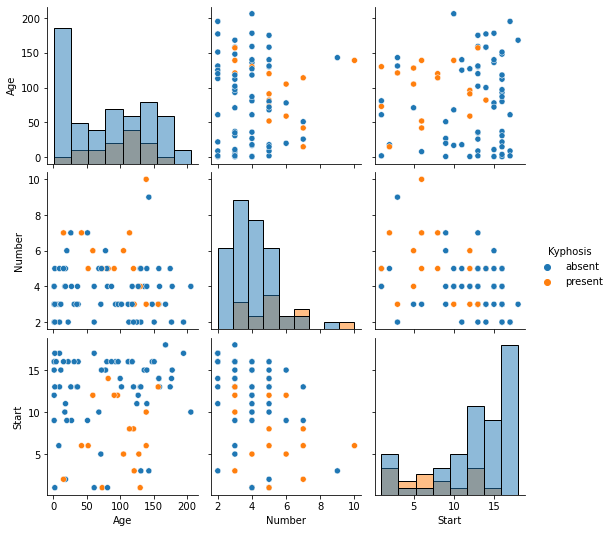

In [14]:
plt.grid
sns.pairplot(df, hue="Kyphosis", diag_kind='hist')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop("Kyphosis", axis= 1)

In [17]:
y = df['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(predictions, y_test))
print('\n')
print(classification_report(predictions, y_test))

[[19  5]
 [ 1  0]]


              precision    recall  f1-score   support

      absent       0.95      0.79      0.86        24
     present       0.00      0.00      0.00         1

    accuracy                           0.76        25
   macro avg       0.47      0.40      0.43        25
weighted avg       0.91      0.76      0.83        25



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[20  0]
 [ 5  0]]


              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

    accuracy                           0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



C:\Users\souma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\souma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\souma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64